# task3 teste 
testes em frames do video


In [1]:
import os
import shutil
from pathlib import Path
import numpy as np
import random

np.random.seed(0) 
random.seed(0)


Vídeo selecionado: /mounts/OSS_dataset/Train/videos/I24C.mp4

0: 384x640 1 clamp, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


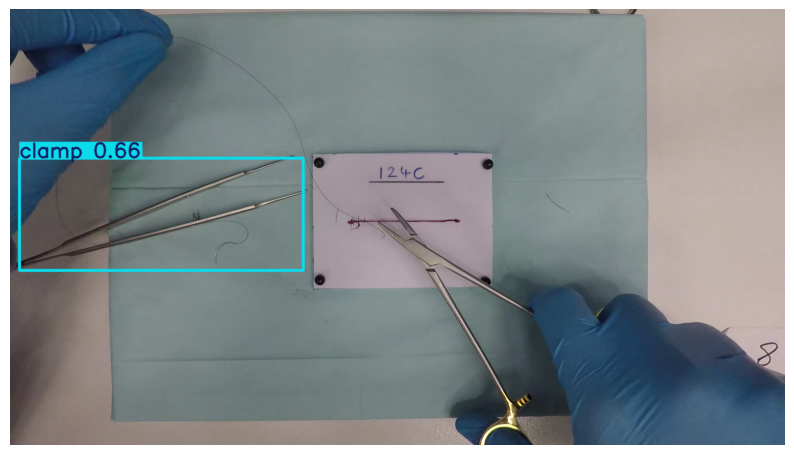

In [12]:
import random
from pathlib import Path
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

video_dir = Path("/mounts/OSS_dataset/Train/videos")  
video_files = list(video_dir.glob("*.mp4"))  

video_path = random.choice(video_files)
print(f"Vídeo selecionado: {video_path}")

# abrir video com OpenCV
cap = cv2.VideoCapture(str(video_path))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# random frame
rand_frame = random.randint(0, frame_count - 1)
cap.set(cv2.CAP_PROP_POS_FRAMES, rand_frame)
ret, frame = cap.read()
cap.release()

#model = YOLO("/mounts/grupo1/yolo_models/yoloFineTune.pt")
model = YOLO("/mounts/grupo1/yolo_models/yoloTrackingWithSegmentation.pt")

if not ret:
    print("Erro ao ler o frame.")
else:
    results = model(frame)

    result_img = results[0].plot()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



In [46]:
import random
from pathlib import Path
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

video_dir = Path("/mounts/OSS_dataset/Train/videos")  
video_files = list(video_dir.glob("*.mp4"))  

video_path = random.choice(video_files)
print(f"Vídeo selecionado: {video_path}")

model = YOLO("/mounts/grupo1/yoloTrackingWithHands.pt")
cap = cv2.VideoCapture(str(video_path))

if not cap.isOpened():
    print("Erro ao abrir o vídeo")
    exit()

# Configurar matplotlib para atualização em tempo real
plt.ion()
fig, ax = plt.subplots(figsize=(12, 8))

frame_count = 0
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Fim do vídeo")
        break
    
    # Fazer detecção
    results = model(frame)
    annotated_frame = results[0].plot()
    
    # Converter BGR para RGB para matplotlib
    rgb_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    
    # Atualizar plot
    ax.clear()
    ax.imshow(rgb_frame)
    ax.set_title(f'Frame {frame_count}')
    ax.axis('off')
    plt.pause(0.001)  # Pequena pausa para atualização
    
    frame_count += 1
    
    # Opcional: processar apenas alguns frames para teste
    if frame_count > 50:  # Parar após 50 frames
        break

cap.release()
plt.ioff()
plt.show()


Vídeo selecionado: /mounts/OSS_dataset/Train/videos/A99Y.mp4


FileNotFoundError: [Errno 2] No such file or directory: '/mounts/grupo1/yoloTrackingWithHands.pt'